<a href="https://colab.research.google.com/github/kn9ck/MAT422/blob/master/HW_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE for Random Samples
Maximum Likelihood Estimation (MLE) is a method used to estimate the parameters of a probability distribution. The idea is to find the parameter values that make the observed data most probable. These points in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. MLE is very intuitive because it essentially tries to "fit" the distribution to the data in the best possible way.

**Definition 2.4.1**
$$ f(x_1,x_2,\dots,x_n;\theta_1,\dots,\theta_m) $$ is the likelihood function of the parameters $\theta_1,\dots,\theta_m$ with unknown values and observed sample values $x_1,x_2,\dots,x_n$. The parameters that maximize this function are the maximum likelihood estimates, $\hat{\theta}_1,\dots,\hat{\theta}_m$ such that $$f(x_1,x_2,\dots,x_n;\hat{\theta}_1,\dots,\hat{\theta}_m) \ge f(x_1,x_2,\dots,x_n;\theta_1,\dots,\theta_m) \text{ for all }  \theta_1,\dots,\theta_m$$




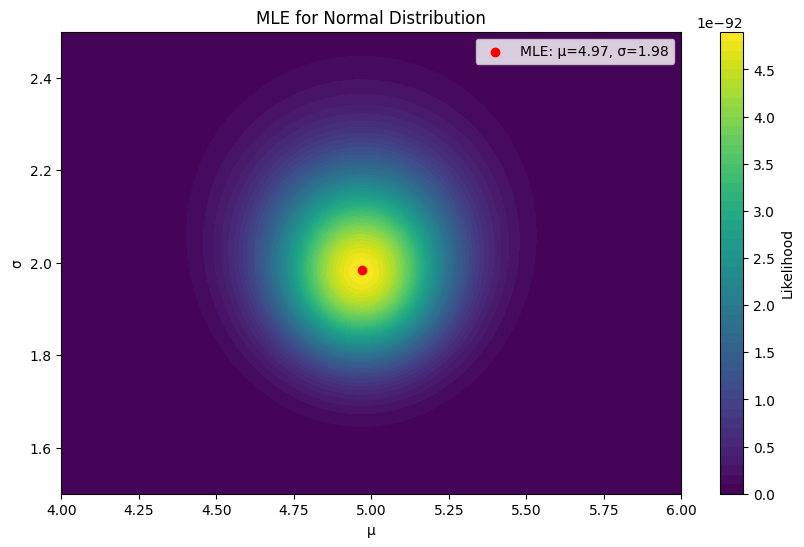

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#generate random sample from normal distribution
np.random.seed(442)
sample = np.random.normal(loc=5, scale=2, size=100)

#likelihood function
def likelihood(mu, sigma, data):
    return np.prod(norm.pdf(data, loc=mu, scale=sigma))

#grid search for MLE
mu_values = np.linspace(4, 6, 100)
sigma_values = np.linspace(1.5, 2.5, 100)
likelihood_values = np.array([[likelihood(mu, sigma, sample) for sigma in sigma_values] for mu in mu_values])

#gind MLE estimates
max_likelihood_idx = np.unravel_index(np.argmax(likelihood_values), likelihood_values.shape)
mle_mu, mle_sigma = mu_values[max_likelihood_idx[0]], sigma_values[max_likelihood_idx[1]]

#plot
plt.figure(figsize=(10, 6))
plt.contourf(mu_values, sigma_values, likelihood_values.T, levels=50, cmap="viridis")
plt.colorbar(label='Likelihood')
plt.scatter(mle_mu, mle_sigma, color='red', label=f'MLE: μ={mle_mu:.2f}, σ={mle_sigma:.2f}')
plt.xlabel('μ')
plt.ylabel('σ')
plt.title('MLE for Normal Distribution')
plt.legend()
plt.show()


This example generates a sample from a normal distribution and uses a grid search to find the maximum likelihood estimates for $μ$ and $σ$.

# Linear Regression using MLE

The common approach in linear regression is to minimize the sum of squared differences between the observed values and the values predicted by the linear model. This method is known as **Least Squares**. This approach actually is equivalent to **MLE** if we assume that the errors in the model follow a normal distribution with mean 0 and variance σ².

Here, we solve a linear regression problem using the OLS approach with scikit's
 `LinearRegression`. We follow with a MLE approach and show how minimizing the sum of squared errors is equivalent to maximizing the likelihood function.

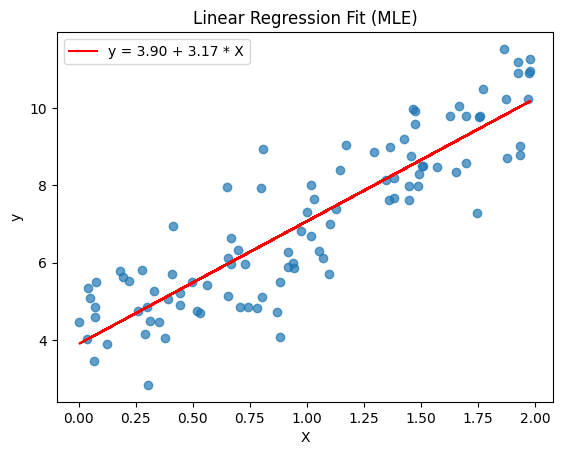

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#generate data
np.random.seed(56)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

#fit linear regression using sklearn, equivalent to MLE
model = LinearRegression()
model.fit(X, y)

#predict
y_pred = model.predict(X)

#plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X, y_pred, color='red', label=f'y = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.2f} * X')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


In [19]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy import stats

#likelihood function for MLE
def likelihood(params):
    intercept, beta, sd = params[0], params[1], params[2]
    yhat = intercept + beta * x
    negLogLike = -np.sum(stats.norm.logpdf(y, loc=yhat, scale=sd))
    return negLogLike

#initial parameter guesses (intercept, beta, sigma)
guess = np.array([3, 3, 3])

#minimize negative log likelihood
results = minimize(likelihood, guess, method='Nelder-Mead', options={'disp': True})

results_df = pd.DataFrame({'coef': results['x']})
results_df.index = ['constant', 'x', 'sigma']
print(results_df.head(2))


Optimization terminated successfully.
         Current function value: 140.376648
         Iterations: 88
         Function evaluations: 157
              coef
constant  3.902824
x         3.167214


As we can see the coefficients found are the same.